In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Load the data
data = """
Date,Usage,Notifications,Times opened,App
08/26/2022,38,70,49,Instagram
08/27/2022,39,43,48,Instagram
08/28/2022,64,231,55,Instagram
08/29/2022,14,35,23,Instagram
08/30/2022,3,19,5,Instagram
08/31/2022,19,25,20,Instagram
09/01/2022,44,23,57,Instagram
09/02/2022,16,28,22,Instagram
09/03/2022,27,15,25,Instagram
09/04/2022,72,29,30,Instagram
09/05/2022,42,24,51,Instagram
09/06/2022,19,34,25,Instagram
09/07/2022,38,23,19,Instagram
09/08/2022,71,48,43,Instagram
09/09/2022,43,68,70,Instagram
09/10/2022,45,71,70,Instagram
09/11/2022,94,180,95,Instagram
09/12/2022,114,99,102,Instagram
09/13/2022,17,45,39,Instagram
09/14/2022,1,10,2,Instagram
09/15/2022,2,15,4,Instagram
09/16/2022,3,13,5,Instagram
09/17/2022,2,9,3,Instagram
09/18/2022,3,8,5,Instagram
09/19/2022,4,8,3,Instagram
09/20/2022,5,11,5,Instagram
09/21/2022,2,12,8,Instagram
08/26/2022,82,209,105,Whatsapp
08/27/2022,69,111,68,Whatsapp
08/28/2022,130,183,86,Whatsapp
08/29/2022,59,157,74,Whatsapp
08/30/2022,128,246,87,Whatsapp
08/31/2022,108,169,77,Whatsapp
09/01/2022,23,99,47,Whatsapp
09/02/2022,76,144,103,Whatsapp
09/03/2022,1,80,16,Whatsapp
09/04/2022,6,38,33,Whatsapp
09/05/2022,126,218,121,Whatsapp
09/06/2022,91,205,110,Whatsapp
09/07/2022,160,212,83,Whatsapp
09/08/2022,69,217,82,Whatsapp
09/09/2022,119,405,192,Whatsapp
09/10/2022,103,166,79,Whatsapp
09/11/2022,203,173,92,Whatsapp
09/12/2022,182,290,172,Whatsapp
09/13/2022,71,153,91,Whatsapp
09/14/2022,64,192,67,Whatsapp
09/15/2022,50,181,58,Whatsapp
09/16/2022,71,176,91,Whatsapp
09/17/2022,212,212,120,Whatsapp
09/18/2022,244,303,132,Whatsapp
09/19/2022,77,169,105,Whatsapp
09/20/2022,58,190,78,Whatsapp
09/21/2022,89,262,68,Whatsapp
"""

# Create DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# 1. Summary Statistics
print("="*50)
print("Summary Statistics (Grouped by App)")
print("="*50)
summary = df.groupby('App').agg(
    Avg_Usage=('Usage', 'mean'),
    Max_Usage=('Usage', 'max'),
    Min_Usage=('Usage', 'min'),
    Avg_Notifications=('Notifications', 'mean'),
    Max_Notifications=('Notifications', 'max'),
    Min_Notifications=('Notifications', 'min'),
    Avg_Opens=('Times opened', 'mean'),
    Max_Opens=('Times opened', 'max'),
    Min_Opens=('Times opened', 'min')
).round(1)
print(summary)

Summary Statistics (Grouped by App)
           Avg_Usage  Max_Usage  Min_Usage  Avg_Notifications  \
App                                                             
Instagram       31.1        114          1               44.3   
Whatsapp        98.9        244          1              191.1   

           Max_Notifications  Min_Notifications  Avg_Opens  Max_Opens  \
App                                                                     
Instagram                231                  8       32.7        102   
Whatsapp                 405                 38       90.3        192   

           Min_Opens  
App                   
Instagram          2  
Whatsapp          16  


In [ ]:
# 2. Time Series Visualization
plt.figure(figsize=(14, 16))
plt.suptitle('App Usage Patterns (Aug 26 - Sep 21 2022)', fontsize=16)

Text(0.5, 0.98, 'App Usage Patterns (Aug 26 - Sep 21 2022)')

<Figure size 1400x1600 with 0 Axes>

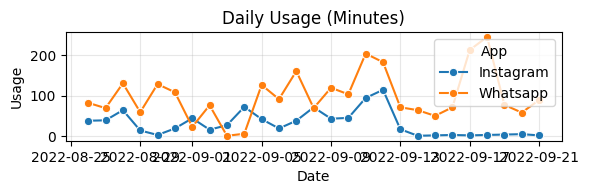

In [ ]:
#Usage plot
plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='Date', y='Usage', hue='App', marker='o')
plt.title('Daily Usage (Minutes)')
plt.grid(True, alpha=0.3)

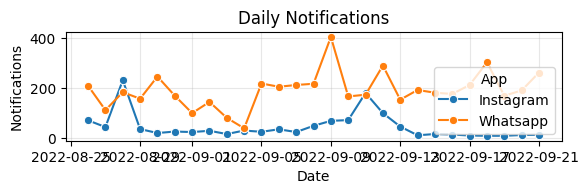

In [ ]:
# Notifications plot
plt.subplot(3, 1, 2)
sns.lineplot(data=df, x='Date', y='Notifications', hue='App', marker='o')
plt.title('Daily Notifications')
plt.grid(True, alpha=0.3)

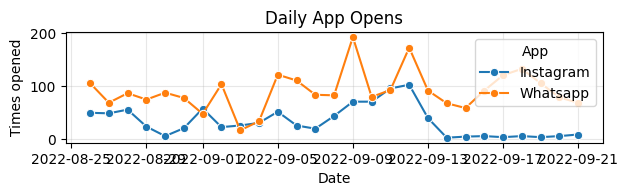

In [ ]:
# Times opened plot
plt.subplot(3, 1, 3)
sns.lineplot(data=df, x='Date', y='Times opened', hue='App', marker='o')
plt.title('Daily App Opens')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('usage_trends.png', dpi=300)
plt.show()

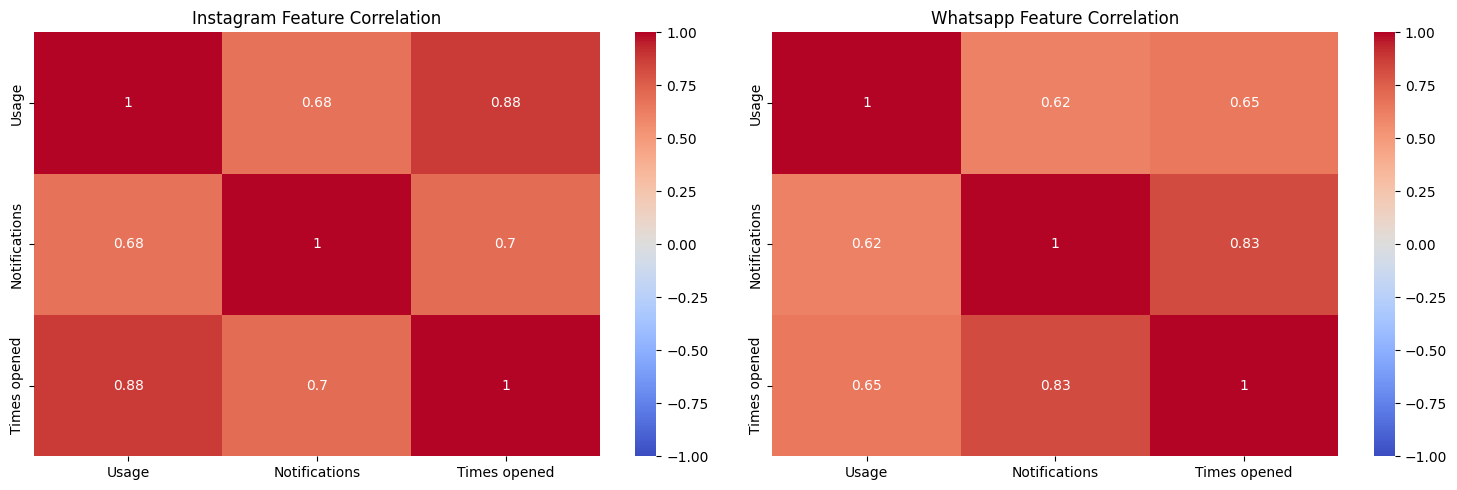

In [ ]:
# 3. Correlation Analysis
plt.figure(figsize=(15, 5))
for i, app in enumerate(['Instagram', 'Whatsapp'], 1):
    plt.subplot(1, 2, i)
    app_data = df[df['App'] == app]
    sns.heatmap(
        app_data[['Usage', 'Notifications', 'Times opened']].corr(),
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    plt.title(f'{app} Feature Correlation')
plt.tight_layout()
plt.savefig('correlation_heatmaps.png', dpi=300)
plt.show()

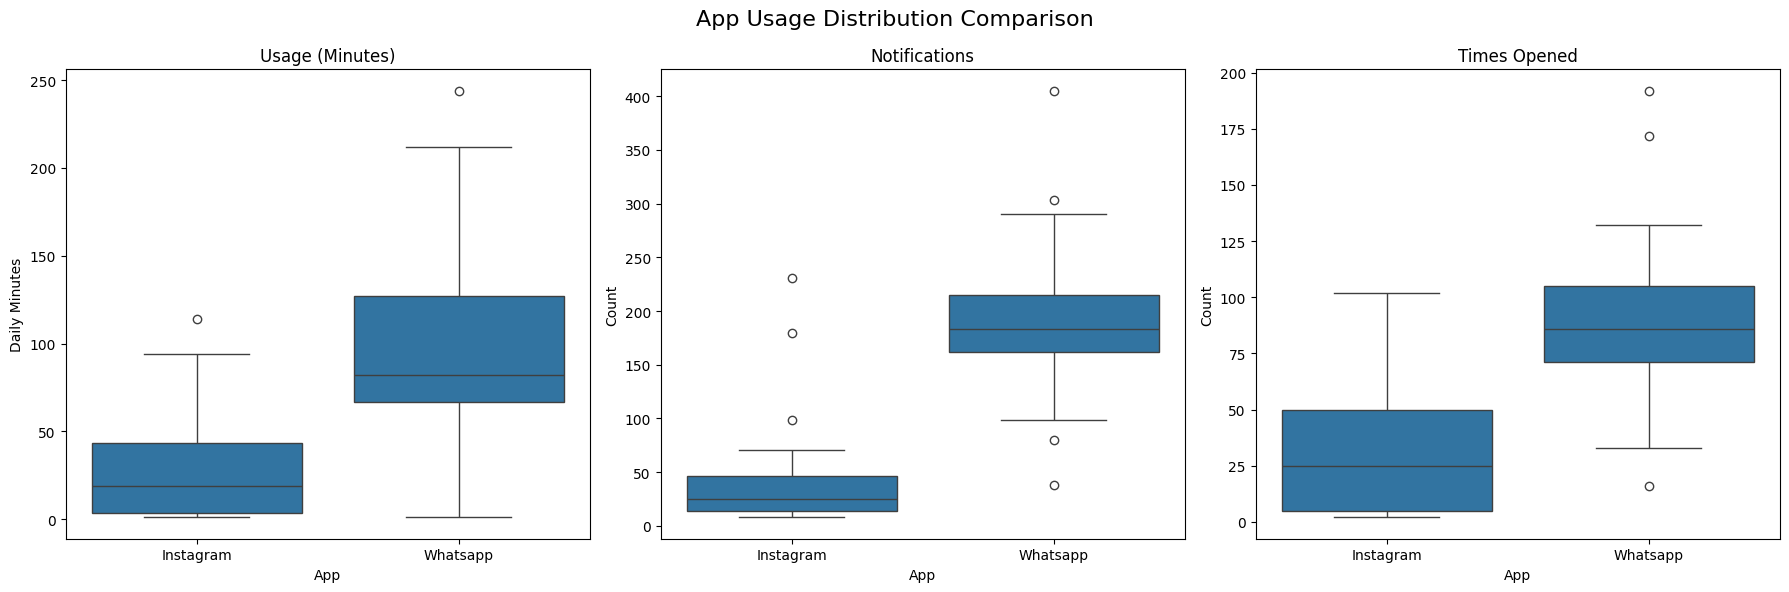

In [ ]:
# 4. Comparative Analysis
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('App Usage Distribution Comparison', fontsize=16)

# Usage comparison
sns.boxplot(data=df, x='App', y='Usage', ax=ax[0])
ax[0].set_title('Usage (Minutes)')
ax[0].set_ylabel('Daily Minutes')

# Notifications comparison
sns.boxplot(data=df, x='App', y='Notifications', ax=ax[1])
ax[1].set_title('Notifications')
ax[1].set_ylabel('Count')

# Opens comparison
sns.boxplot(data=df, x='App', y='Times opened', ax=ax[2])
ax[2].set_title('Times Opened')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.savefig('comparative_analysis.png', dpi=300)
plt.show()

In [ ]:
# 5. Anomaly Detection
# Identify low-usage days
instagram_low = df[(df['App'] == 'Instagram') & (df['Usage'] < 5)]
whatsapp_low = df[(df['App'] == 'Whatsapp') & (df['Usage'] < 10)]

print("="*50)
print("Instagram Low-Usage Anomalies (Sep 14-21)")
print("="*50)
print(instagram_low)

print("\n" + "="*50)
print("WhatsApp Low-Usage Anomalies (Sep 3-4)")
print("="*50)
print(whatsapp_low)

Instagram Low-Usage Anomalies (Sep 14-21)
         Date  Usage  Notifications  Times opened        App
4  2022-08-30      3             19             5  Instagram
19 2022-09-14      1             10             2  Instagram
20 2022-09-15      2             15             4  Instagram
21 2022-09-16      3             13             5  Instagram
22 2022-09-17      2              9             3  Instagram
23 2022-09-18      3              8             5  Instagram
24 2022-09-19      4              8             3  Instagram
26 2022-09-21      2             12             8  Instagram

WhatsApp Low-Usage Anomalies (Sep 3-4)
         Date  Usage  Notifications  Times opened       App
35 2022-09-03      1             80            16  Whatsapp
36 2022-09-04      6             38            33  Whatsapp


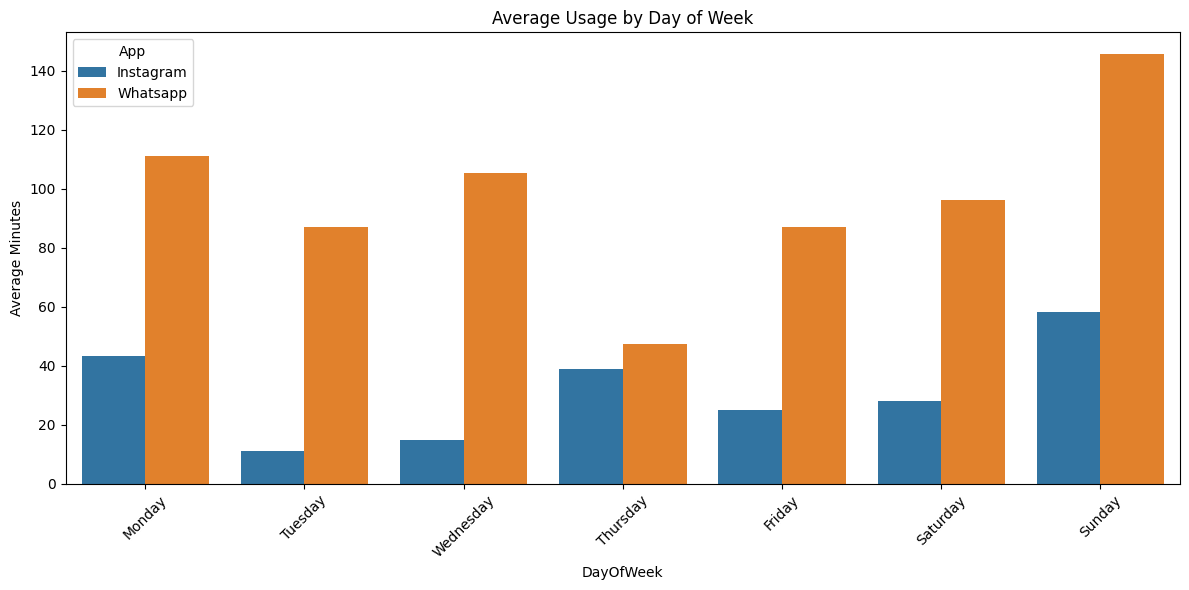

In [ ]:
# 6. Weekly Pattern Analysis
df['DayOfWeek'] = df['Date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='DayOfWeek',
    y='Usage',
    hue='App',
    order=weekday_order,
    errorbar=None
)
plt.title('Average Usage by Day of Week')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('weekly_patterns.png', dpi=300)
plt.show()